<a href="https://colab.research.google.com/github/blackscreen-whitetext/AIDS/blob/main/UMC301_Assignment_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMC 301: Applied Data Science and Artificial Intelligence
## Assignment 1a

### Submission instructions:


1.   The assignment is to be submitted in ONE single notebook.
2.   Submit the .ipynb file and pdf of the same with all cells open through this Teams Assignment.
3. If your IISc email ID is < username > @iisc.ac.in, then name the file < username >_Assgn_1a. E.g. jonathan_Assgn_1a for email ID jonathan@iisc.ac.in.
4. Before submission, execute the ’Restart session and run all’ option from the Runtime/Kernel tab. Verify that there are no errors and that you are getting the output you expect.
5. Use the dataset **'SeoulBikeData.csv'**: https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1
6. Use significance level $\alpha = 0.05$ for all questions.
7. Calculate the hypothesis test statistics (stat_value, p_value, dof etc.) using equations and validate using the inbuit python functions.

In [2]:
import pandas
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pandas.read_csv('SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Question 1
Test if the mean of hourly bike rentals reduces if "Snowfall" is non zero in winter season. Use entire winter data from 'SeoulBikeData.csv'. Choose appropriate hypothesis test.

In [4]:
data_= data[(data["Seasons"] == "Winter")]
data_with_snow = data_[(data_["Snowfall (cm)"] > 0)]
data_wo_snow = data_[(data_["Snowfall (cm)"] == 0)]

In [5]:
mean_with_snow = data_with_snow["Rented Bike Count"].mean()
mean_wo_snow = data_wo_snow["Rented Bike Count"].mean()
sd_with_snow = data_with_snow["Rented Bike Count"].std()
sd_wo_snow = data_wo_snow["Rented Bike Count"].std()
z = (mean_with_snow - mean_wo_snow) / ((sd_with_snow**2/len(data_with_snow)) + (sd_wo_snow**2/len(data_wo_snow)))**0.5
p_value = 2*norm.cdf(-abs(z))

In [6]:
t_stat, p_val = stats.ttest_ind(data_with_snow["Rented Bike Count"], data_wo_snow["Rented Bike Count"])
print("z-statistic: ", z)
print("p-value: ", p_value)
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

z-statistic:  -12.587491780039079
p-value:  2.4741057258547496e-36
t-statistic:  -10.163358641541603
p-value:  9.799394129697895e-24


Since p-value from both z and t tests are very low, it suffices to say that we can reject the null hypothesis. Thus the hourly bike rentals have reduced as can be seen with the statistics taking negative values. 

# Question 2

Visualize the hourly non-zero rainfall distribution and identify four quartiles. Test if the mean hourly count of bike rentals in the four quartiles are different using 1 way ANOVA test.

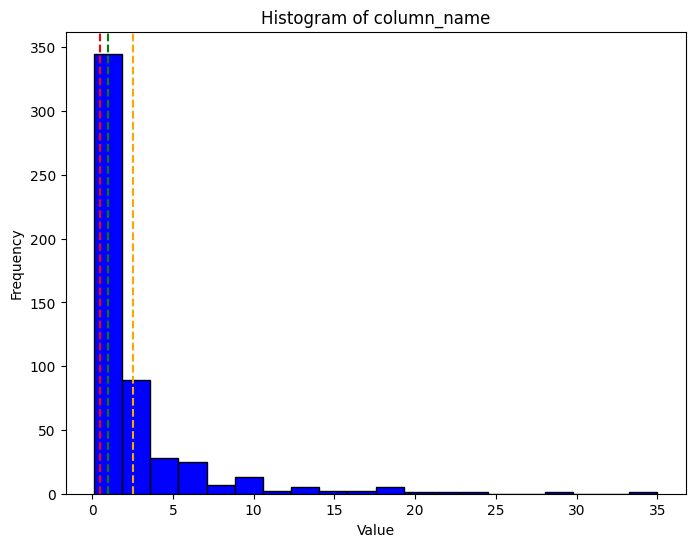

In [11]:
data_non_zero_rainfall = data[(data["Rainfall(mm)"] > 0)]
Q1,Q2,Q3 = np.percentile(data_non_zero_rainfall["Rainfall(mm)"], [25, 50, 75]).tolist()
plt.figure(figsize=(8, 6))
plt.hist(data_non_zero_rainfall["Rainfall(mm)"], bins=20, color='blue', edgecolor='black')
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='green', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
plt.axvline(Q3, color='orange', linestyle='--', label=f'Q3 (75th percentile): {Q3:.2f}')
plt.title('Histogram of Hourly Rainfall(mm)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
Q1,Q2,Q3
quar1 = (data_non_zero_rainfall.loc[data_non_zero_rainfall["Rainfall(mm)"] <= Q1, "Rented Bike Count"]).reset_index(drop=True).tolist()
quar2 = (data_non_zero_rainfall.loc[(data_non_zero_rainfall["Rainfall(mm)"] > Q1) & (data_non_zero_rainfall["Rainfall(mm)"] <= Q2), "Rented Bike Count"]).reset_index(drop=True).tolist()
quar3 = (data_non_zero_rainfall.loc[(data_non_zero_rainfall["Rainfall(mm)"] > Q2) & (data_non_zero_rainfall["Rainfall(mm)"] <= Q3), "Rented Bike Count"]).reset_index(drop=True).tolist()
quar4 = (data_non_zero_rainfall.loc[data_non_zero_rainfall["Rainfall(mm)"] > Q3, "Rented Bike Count"]).reset_index(drop=True).tolist()
stats.f_oneway(quar1, quar2, quar3, quar4)


F_onewayResult(statistic=np.float64(12.763393537618176), pvalue=np.float64(4.6219482371881094e-08))

Conclusion: The means of at least 2 of the 4 groups are different. Since the p-value is low the null hypothesis that is "All means are the same" has to be rejected.

# Question 3
Visualize the average hourly bike rentals in Summer Season and Spring Season. Identify if the two distributions are different using Chi-squared test.

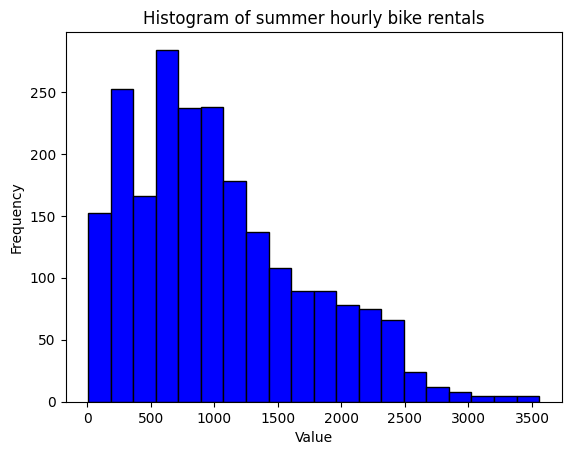

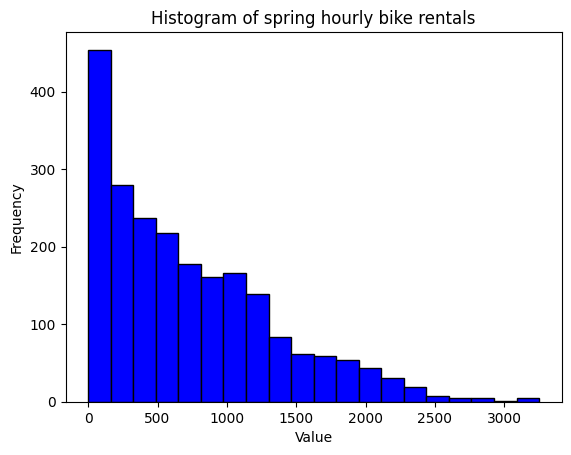

In [20]:
data_summer = data[(data["Seasons"] == "Summer")]
data_spring = data[(data["Seasons"] == "Spring")]
plt.hist(data_summer["Rented Bike Count"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of summer hourly bike rentals')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
plt.hist(data_spring["Rented Bike Count"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of spring hourly bike rentals')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [35]:
def chi_squared_test(data_summer, data_spring, n_bins=10):    
    data_max = max(data_summer["Rented Bike Count"].max(), data_spring["Rented Bike Count"].max())

    bins = np.linspace(0, data_max, n_bins+1)
    hist_summer, _ = np.histogram(data_summer["Rented Bike Count"], bins=bins)
    hist_spring, _ = np.histogram(data_spring["Rented Bike Count"], bins=bins)
    
    # Create a contingency table
    contingency_table = np.vstack([hist_summer, hist_spring]).T

    # Perform Chi-Squared Test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction=False)
    return chi2_stat, p_value, dof, expected
for i in range(5, 25, 5):
    chi2_stat, p_value, dof, expected = chi_squared_test(data_summer, data_spring, n_bins=i)
    print(f"Chi-Squared Test with {i} bins:")
    print("p value: ", p_value)
    print("dof: ", dof)
    


Chi-Squared Test with 5 bins:
p value:  2.0114349003371926e-40
dof:  4
Chi-Squared Test with 10 bins:
p value:  1.0383744262126271e-44
dof:  9
Chi-Squared Test with 15 bins:
p value:  5.53384021620029e-56
dof:  14
Chi-Squared Test with 20 bins:
p value:  2.9779638599611766e-59
dof:  19


As can be seen from very few to very high number of bins, the p value is negligible and the null hypothesis must be rejected, that is the distributions of hourly bike rentals in the spring and summer don't have the same distribution.